<a href="https://colab.research.google.com/github/harshitamotwani/ML_DL/blob/master/Handwriting_MNIST_convfilters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Handwriting MNIST recognization 

In [1]:
import tensorflow as tf
from os import path, getcwd, chdir
import matplotlib.pyplot as plt
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
print("x_train_shape:{}, y_train_shape:{}".format(x_train.shape, y_train.shape))
print("x_test_shape:{}, y_test_shape:{}".format(x_test.shape, y_test.shape))

x_train_shape:(60000, 28, 28), y_train_shape:(60000,)
x_test_shape:(10000, 28, 28), y_test_shape:(10000,)


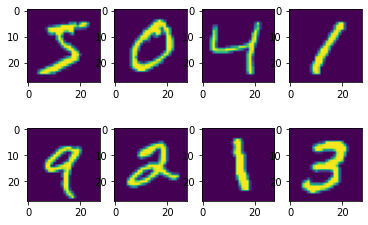

In [4]:
for i in range(8):
    plt.subplot(240+1+i)
    plt.imshow(x_train[i])
plt.show()

In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.997):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [6]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
 model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(2, 2),   
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),                      
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

In [9]:
model.compile(optimizer="adam", loss="SparseCategoricalCrossentropy", metrics=["accuracy"])

In [10]:
callbacks = myCallback()

In [11]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[callbacks])

Epoch 1/20
1875/1875 [==============================] - 160s 85ms/step - loss: 0.1146 - accuracy: 0.9645 - val_loss: 0.0435 - val_accuracy: 0.9858
Epoch 2/20
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0387 - accuracy: 0.9878 - val_loss: 0.0337 - val_accuracy: 0.9893
Epoch 3/20
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.0279 - val_accuracy: 0.9916
Epoch 4/20
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0180 - accuracy: 0.9945 - val_loss: 0.0337 - val_accuracy: 0.9884
Epoch 5/20
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0143 - accuracy: 0.9952 - val_loss: 0.0311 - val_accuracy: 0.9906
Epoch 6/20
1875/1875 [==============================] - 156s 83ms/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.0291 - val_accuracy: 0.9921
Epoch 7/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 0.9971
Reached 99% accuracy

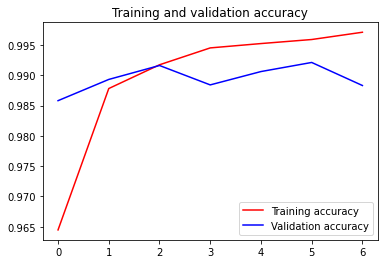

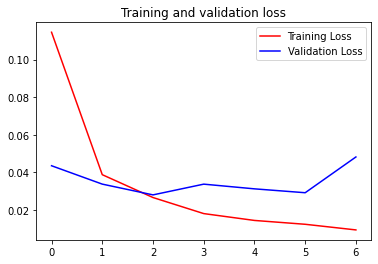

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()